<h1>Projekt do VVP - Planety</h1>

Abychom mohli simulaci spustit, je nejprve potřeba vytvořit instanci třídy Simulation a zadání následujích parametrů:
- n (počet iterací), defaultně = 100
- timestep (časový interval), defaultně = 86400 s = 1 den

Pak musíme vstupní data planet načíst z JSON souboru pomocí funkce "read_from_file", jejíž parametry jsou:
- input_file (vstupní JSON soubor)
- random (jestli chceme vstupní paramatry náhodně změnit, aby se vytvořila náhodná simulace), defaultně False, tedy nic neměníme

A můžem provést simulaci funkci "simulate". Do ní můžem dát ještě parametr "container" na True, tím se hlídá, jestli planety jsou v desetinásobné vzdálenosti od počátku souřadnic, jako když byly na začátku simulace, pokud ne, simulaci ukončí.

Nakonec si můžeme vykreslit trajektorie planet pomocí funkcí "plot_image" nebo "plot_video". První funkce vykreslí graf trajektorií podle módu buď ve spojitých křivkách (mód 1), nebo v bodech (mód 2).

plot_video uloží desetisekundovou animaci pohybu planet do souboru animation.gif


In [33]:
#importujeme potrebne moduly
import importlib
import sys
from projekt.main import Simulation
from projekt.main import Planet
importlib.reload(sys.modules['projekt.main'])
importlib.reload(sys.modules['projekt.planet'])

<module 'projekt.planet' from '/home/student/Desktop/VVP_projekt/projekt/planet.py'>

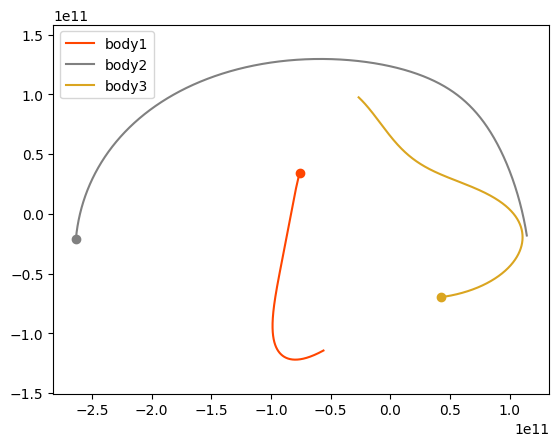

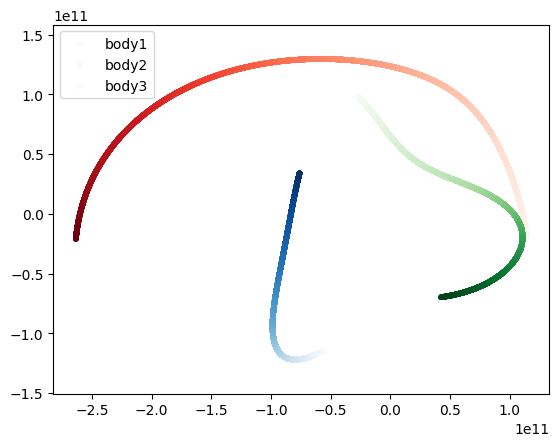

In [34]:
#vytvorime simulaci
sim = Simulation(10000, 86400)
#nacteme ze souboru
sim.read_from_file("projekt/input_data/B3.json", False)
#spustime pohyb
sim.simulate(False)
#vykreslime
sim.plot_image(1)
sim.plot_image(2)

Můžeme zkoušet furt dokola. Další simulace vyjde z konečných pozic té minulé.

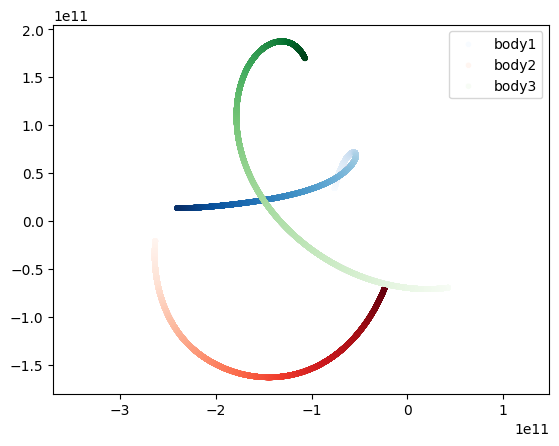

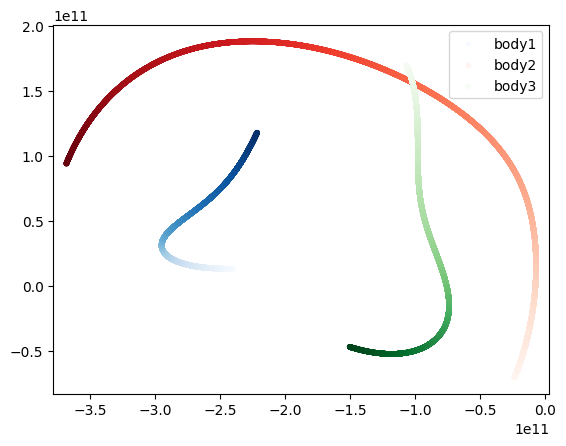

In [35]:
sim.simulate(False)
sim.plot_image(2)
sim.simulate(False)
sim.plot_image(2)


Můžeme i vypsat aktuální pozice planet:

In [36]:
print(sim.planets[0])
print(sim.planets[1])
print(sim.planets[2])

Planet name: body1
Planet mass: 7.434559733701126e+26
Planet velocity: [122.27600496 258.78249379]
Planet acceleration: [-6.00651712e-07 -7.96474678e-07]
Current coords: -221689054743.1037, 118050244428.0806
Planet name: body2
Planet mass: 2.9566074609778556e+26
Planet velocity: [-242.38966578 -593.44658703]
Planet acceleration: [2.50685850e-06 1.74497213e-07]
Current coords: -368317040510.9937, 94252252367.2468
Planet name: body3
Planet mass: 3.4325787883158545e+26
Planet velocity: [-402.59107062  126.54674286]
Planet acceleration: [-8.58309657e-07  1.57476904e-06]
Current coords: -150538321572.98856, -46599463538.29567


<h2>Sluneční soustava</h2>

Teď vykreslování sluneční soustavy. Reálný čas je 100 let. Vidíme, že trajektorie planet se s časovým intervalem 1 den moc neodchylují od normálu (můžeme akorát vidět menší odchylku u Merkuru). Ve druhé simulaci změníme časový interval na 3 dny a zde trajektorie už mají odchylku značně větší. Ve třetí simulaci s intervalem 10 dní bude rozdíl ještě větší.

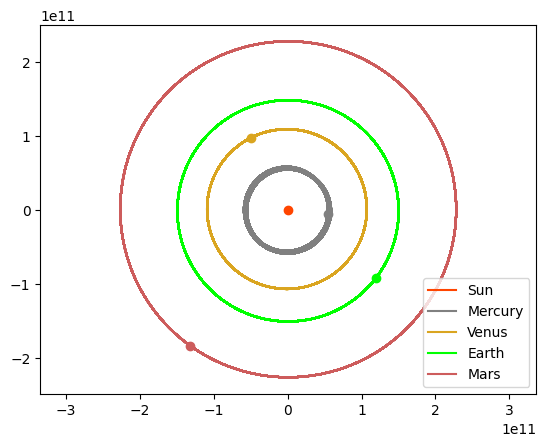

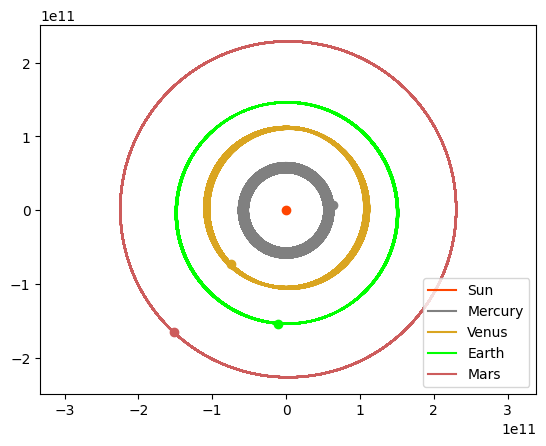

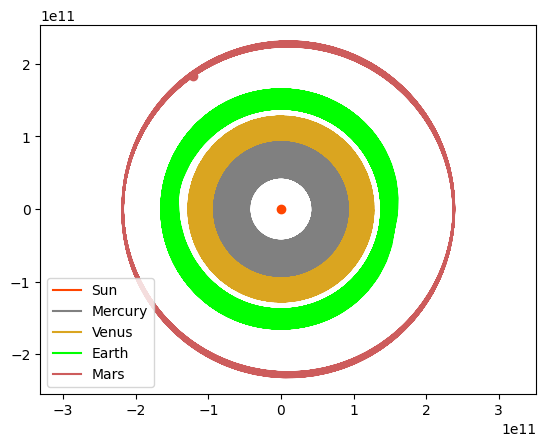

In [37]:
sims: list = [Simulation(36500, 86400), Simulation(12167, 259200), Simulation(3650, 864000)]

for s in sims: 
    s.read_from_file("projekt/input_data/SS4.json", False)
    s.simulate(False)
    s.plot_image(1)

<h2>Náhodné parametry</h2>

Zde je použit soubor o třech tělesech a náhodné parametry. Někde to generuje zajímavé trajektorie, stojí za to si to párkrát vyzkoušet. Pomocí proměnné container (u funkce "simulate" dáme parametr na True) je každý objekt uzavřen do pomyslného kulovitého kontejneru a jak z něj vyskočí, simulace se zastaví, protože je velmi pravděbodobné, že zdegenerovala a objekty už na sebe nikdy nebudou působit tak, aby se k sobě zase přiblížily.

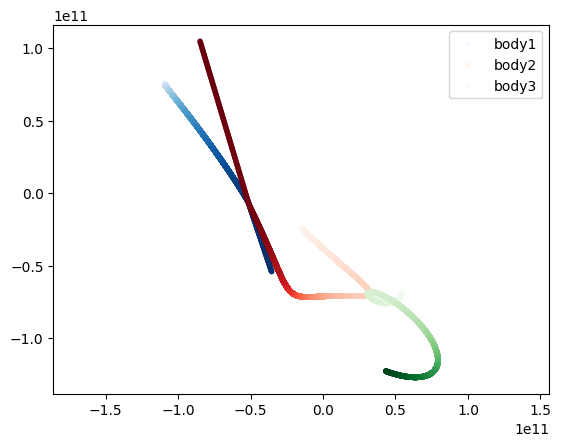

In [31]:
random_sim = Simulation(5000, 86400)
random_sim.read_from_file("projekt/input_data/B3.json", True)
random_sim.simulate(True)
random_sim.plot_image(2)

<h2>Animace</h2>

Pro ukládání trajektorií jako animace nastavíme stačí zavolat funkci "plot_video", do níž vložíme akorát název .gif souboru, což vytvoří animaci dlouhou 10 sekund ve formátu gif. Defaultně se animace ukládá do "animation.gif"

MovieWriter PillowWriter unavailable; using Pillow instead.


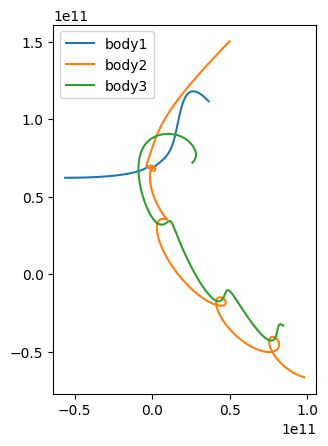

In [11]:
random_sim.plot_video("animation.gif")